<a href="https://colab.research.google.com/github/FrankJRix/lab_util/blob/main/Copia_di_lab_util_provvisorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
 bode
'bode_dettaglio_filtro#1 (dati10k - Foglio1.).pdf'
'bode_dettaglio_filtro#1 (dati220k - Foglio1.).pdf'
'bode_dettaglio_filtro#1 (dati2k_4 - Foglio1.).pdf'
'bode_dettaglio_filtro#1 (dati50k - Foglio1.).pdf'
'bode_T (dati10k - Foglio1.).pdf'
'bode_T (dati220k - Foglio1.).pdf'
'bode_T (dati2k_4 - Foglio1.).pdf'
'bode_T (dati50k - Foglio1.).pdf'
'dati10k - Foglio1.csv'
 dati10k.gsheet
'dati220k - Foglio1.csv'
 dati220k.gsheet
'dati2k_2 - Foglio1.csv'
'dati2k_3 - Foglio1.csv'
'dati2k_4 - Foglio1.csv'
 dati2k_4.gsheet
'dati2k - Foglio1.csv'
'dati50k - Foglio1.csv'
 dati50k.gsheet
 labss4.ipynb
'provalabss4_2 - Foglio1.csv'
'slew rate.gsheet'
'slew rate.ipynb'



\begin{table}[H]
\centering
\caption{} %inserire caption per dati da dati50k - Foglio1.csv
\label{} %inserire label
\begin{tabular}{rll}
\toprule
 $\nu(Hz)$ &      $V_{in} (V)$ &     $V_{out} (V)$ \\
\midrule
      1000 & 0.586 $\pm$ 0.056 &    27.3 $\pm$ 2.8 \\
      2000 & 0.586 $\pm$ 0.056 &      27

,vin(V),vidiv,vout,vodiv,freq(Hz),err_vin,err_vout,T,err_T
0,0.586,0.2,27.300,10.0,1000,0.056,2.800,33.365301,1.217628
1,0.586,0.2,27.000,10.0,2000,0.056,2.800,33.269323,1.224888
2,0.587,0.2,27.000,10.0,5000,0.056,2.800,33.254513,1.223930
3,0.590,0.2,26.900,10.0,10000,0.056,2.800,33.178005,1.223554
4,0.592,0.2,25.300,10.0,20000,0.056,2.800,32.615976,1.264578
5,0.597,0.2,23.100,10.0,30000,0.056,2.800,31.752753,1.331274
6,0.604,0.2,19.770,10.0,45000,0.056,2.800,30.299395,1.470324
7,0.607,0.2,18.700,10.0,50000,0.056,2.800,29.773058,1.527611
8,0.610,0.2,16.720,5.0,60000,0.056,1.400,28.758129,1.079251
9,0.615,0.2,11.500,5.0,100000,0.056,1.400,25.436454,1.320477


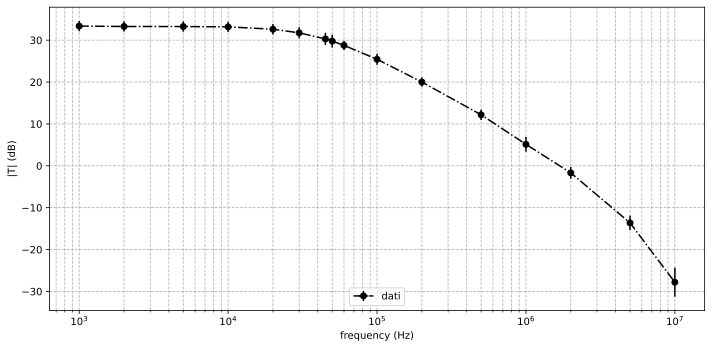

filtro pb #1 per dati da dati50k - Foglio1.csv: (4.44e+04 $\pm$ 1.08e+03)Hz


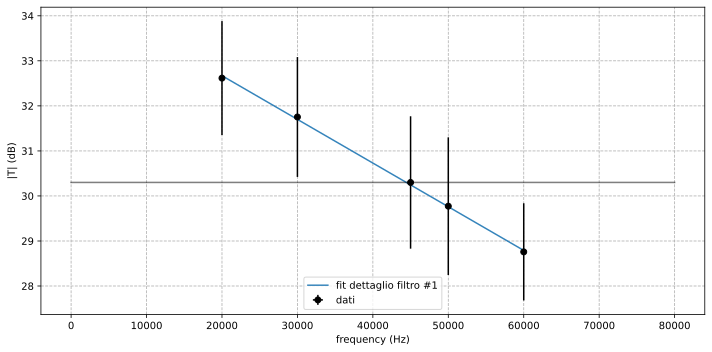

prodotto T*ft per dati50k - Foglio1.csv: (2.07e+06 $\pm$ 7.16e+04)Hz


In [36]:
import os
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import linregress as linfit
from scipy.optimize import curve_fit as cfit
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg') # se su colab, in locale commentata

# la parte sotto va commentata su colab e scommentata in locale su una macchina aggiornata
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

# nel mio drive ho creato una shortcut verso la cartella condivisa e l'ho chiamata 'lab' per accedere più facilmente
lab_dir = '/content/drive/MyDrive/lab/'
# esperienza numero [], in linea con la convenzione usata finora per le cartelle
exp_num = 4
exp_dir = lab_dir + str(exp_num)

if os.path.exists(exp_dir):
    os.chdir(exp_dir)
! ls
print('\n\n')

files = [
'dati2k_4 - Foglio1.csv',
'dati10k - Foglio1.csv',
'dati50k - Foglio1.csv',
'dati220k - Foglio1.csv',
]

# altrimenti metto il file nella macchina virtuale come sempre
fil = files[2]

# def classi

class Filtro:
  def __init__(self, plat, slope_range, ft_range = [], pa = True, f_t = 0):
    self.f_t = f_t
    self.plat = plat
    self.slope_range = slope_range
    self.ft_range = ft_range
    self.pa = pa

# def funzioni

def errori_osc_volt(valori, div):
    """ si aspetta un array di valori misurati e uno di volt/div come da oscilloscopio
    in output array di errori """
    errors = []

    if len(valori) != len(div):
        print('mismatched input size')
        return
    
    for j in range(len(valori)):
        if div[j] >= 10e-3:
            percent = 0.03
        else:
            percent = 0.04

        scala = div[j]*8
        err = percent*scala + 0.005*scala

        errors.append(err)

        #print(f'{j+1}: ({valori[j]:.3g} +/- {err:.3g})V (scala: {scala}V)')
    
    errors = np.array(errors)
    #print('\n')

    return errors

def errori_osc_tempo(valori, div):
    """ si aspetta un array di valori misurati e uno di s/div come da oscilloscopio """
    errors = []

    if len(valori) != len(div):
        print('mismatched input size')
        return
    
    acc = 50e-6
    off = 200e-12
    factor = 16e-3 #16e-4 * num divisioni orizzontali

    for j in range(len(valori)):
        err = acc*valori[j] + off + factor*div[j]
        
        #print(f'{j+1}: ({valori[j]:.3g} +/- {err:.3g})s')
        errors.append(err)
    
    errors = np.array(errors)
    #print('\n')

    return errors

def leggi_csv(path):
    """ path relativo fino al .csv """
    data = pd.read_csv(path)
    data = data.replace(',','.', regex=True)
    data = data.apply(pd.to_numeric, errors='coerce')
    return data

def compute_phi(dt, err_t, f, err_f = []):
    """ si aspetta quattro (tre) array di valori di dt, errore su dt, frequenza e errore su frequenza (facoltativo)
    in output due array phi e err_phi """
    if len(dt) != len(f):
        print('mismatched input size')
        return
    if len(err_f) == 0:
        err_f = np.zeros(len(f))
    dt = np.array(dt)
    f = np.array(f)
    err_t = np.array(err_t)
    err_f = np.array(err_f)

    conv = 360/(2*np.pi)

    phi = 2*np.pi * f * dt
    phi = conv * phi

    err_phi = conv * np.sqrt((2*np.pi*f*err_t)**2+(2*np.pi*dt*err_f)**2)
    return phi, err_phi

def error_format(val, err):
    """ si aspetta un array di valori e uno di errori 
    in output array di stringhe formattate in latex pronte per tabella"""
    if len(val) != len(err):
        print('mismatched input size')
        return
    out = []
    for i in range(len(val)):
        tmp = f'{val[i]:.3g} $\pm$ {err[i]:.3g}'
        out.append(tmp)
    
    return out

def transf_func(vin, vout, err_vin = [], err_vout = []):
    """ quattro (due) array, V_in, V_out e rispettivi errori (facoltativi)
    output modulo e errore di T """
    vin = np.array(vin)
    vout = np.array(vout)
    if len(err_vin) == 0:
        err_vin = np.zeros(len(vin))
    else:
        err_vin = np.array(err_vin)
    if len(err_vin) == 0:
        err_vout = np.zeros(len(vout))
    else:
        err_vout = np.array(err_vout)

    x = 20 * np.log10(vout/vin)
    err_x = 20*np.sqrt( (err_vout/vout)**2 + (err_vin/vin)**2) / np.log(10)

    return x, err_x

def hor(x, q):
    return q

def fun(x, m, q):
    return m * x + q

def gain_band_prod(T, err_T, ft, err_ft):
    Tmax_i = np.argmax(T)
    Tmax = 10 ** (T[Tmax_i]/20)
    err_Tmax = 10 ** (err_T[Tmax_i]/20)

    prodT_f = Tmax * ft
    err_prodT_f = np.sqrt((Tmax*err_ft)**2 + (ft*err_Tmax)**2)

    print(f'prodotto T*ft per {fil}: ({prodT_f:.4g} $\pm$ {err_prodT_f:.3g})Hz')

def bode_plot(T, f, err_T, err_f = [],  phi = [], err_phi = [], filtri = []):
    """ sei (cinque) array, modulo di T, fase di T, frequenza e rispettivi errori (facoltativo quello su f)
    array di oggetti Filtro per cui calcolare cose
    output grafici e stima di freq taglio """
    if len(err_f) == 0:
        err_f = np.zeros(len(f))
    if len(err_phi) == 0:
        err_phi = np.zeros(len(f))

    t = np.linspace(f.min(), f.max(), 2)

    plt.figure(figsize=(10,5))
    plt.errorbar(f, T, yerr=err_T, xerr=err_f, label='dati', marker='o', linestyle='-.', color='black') #, alpha = 0.5)

    num = 1
    mem = []
    for filtro in filtri:
        if len(filtro.slope_range) > 0:
            n1 = filtro.slope_range[0]
            n2 = filtro.slope_range[1]
            max = filtro.plat

            if max not in mem:
                plt.plot(t, np.ones(len(t))*max, alpha=0.5, color='black')
                mem.append(max)

            l = np.log(f[n1:n2+1])

            par, cov = cfit(fun, l, T[n1:n2+1], sigma = err_T[n1:n2+1])
            err = np.sqrt(np.diag(cov))

            m = par[0]
            dm = err[0]
            q = par[1]
            dq = err[1]

            ft_pa = np.exp((max-q)/m)
            err_ft_pa = np.sqrt( ((m*dq)**2+(q*dm)**2)*np.exp(2*(max - q)/m) / m**4)
            
            if filtro.pa:
                t_pa = np.linspace(f[n1], ft_pa, 2)
                l_pa = np.log(t_pa)
                print(f'filtro pa #{num} per dati da {fil}: ({ft_pa:.3g} $\pm$ {err_ft_pa:.3g})Hz')
            else:
                t_pa = np.linspace(ft_pa, f[n2], 2)
                l_pa = np.log(t_pa) 
                print(f'filtro pb #{num} per dati da {fil}: ({ft_pa:.3g} $\pm$ {err_ft_pa:.3g})Hz')           

            plt.plot(t_pa, m*l_pa + q, label=f'slope filtro #{num}', alpha = 0.9)
            num += 1

            gain_band_prod(T, err_T, ft_pa, err_ft_pa)

    plt.semilogx()
    plt.xlabel('frequency (Hz)')
    plt.ylabel('|T| (dB)')
    plt.grid(True, 'both', linestyle='--')

    plt.legend(loc='lower center')

    plt.tight_layout()
    plt.savefig(f"bode_T ({fil[:-3]}).pdf", bbox_inches='tight')
    plt.show()

    if len(phi) > 0:
        plt.figure(figsize=(10,5))
        plt.errorbar(f, phi, yerr=err_phi, xerr=err_f, label='dati', marker='o', linestyle='-.', color='black') #, alpha = 0.5)
        plt.semilogx()
        plt.xlabel('frequency (Hz)')
        plt.ylabel('$d\phi$ (deg)')
        

        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.savefig(f"bode_phi ({fil[:-3]}).pdf", bbox_inches='tight')
        plt.show()
    
    num = 1
    for filtro in filtri:
        if len(filtro.ft_range) > 0:
            n1 = filtro.ft_range[0]
            n2 = filtro.ft_range[1]

            max = filtro.plat
            T_3 = max - 3

            mean = (f[n2]-f[n1]) / 2
            t = np.linspace(f[n1] - mean, f[n2] + mean, 2)

            l = f[n1:n2+1]

            par, cov = cfit(fun, l, T[n1:n2+1], sigma = err_T[n1:n2+1])
            err = np.sqrt(np.diag(cov))

            m = par[0]
            dm = err[0]
            q = par[1]
            dq = err[1]

            ft_pa = (T_3-q)/m
            err_ft_pa = np.sqrt( ((m*dq)**2+(T_3-q)**2*dm**2) / m**4)

            if filtro.pa:
                t_pa = np.linspace(f[n1], f[n2], 2)
                print(f'filtro pa #{num} per dati da {fil}: ({ft_pa:.3g} $\pm$ {err_ft_pa:.3g})Hz')
            else:
                t_pa = np.linspace(f[n1], f[n2], 2)
                print(f'filtro pb #{num} per dati da {fil}: ({ft_pa:.3g} $\pm$ {err_ft_pa:.3g})Hz')           

            plt.figure(figsize=(10,5))

            plt.errorbar(f[n1:n2+1], T[n1:n2+1], yerr=err_T[n1:n2+1], xerr=err_f[n1:n2+1], label='dati', marker='o', linestyle='', color='black') #, alpha = 0.5)
            plt.plot(t_pa, m*t_pa + q, label=f'fit dettaglio filtro #{num}', alpha = 0.9)
            plt.plot(t, np.ones(len(t))*T_3, alpha=0.5, color='black')

            plt.xlabel('frequency (Hz)')
            plt.ylabel('|T| (dB)')
            plt.grid(True, 'both', linestyle='--')

            plt.legend(loc='lower center')
            plt.tight_layout()
            plt.savefig(f"bode_dettaglio_filtro#{num} ({fil[:-3]}).pdf", bbox_inches='tight')
            plt.show()
            num += 1

            gain_band_prod(T, err_T, ft_pa, err_ft_pa)

def analisi_risposta(path, filtri, has_dt = False):
    """ path: path al .csv
    filtri : array oggetti filtro
    has_dt: True se c'è l'analisi di phi, default False """
    data = leggi_csv(path)
    tab_misure = pd.DataFrame()
    tab_analisi = pd.DataFrame()
    
    tab_misure.insert(len(tab_misure.columns), '$\nu(Hz)$', data['freq(Hz)'])
    tab_analisi.insert(len(tab_analisi.columns), '$\nu(Hz)$', data['freq(Hz)'])

    err_vi = errori_osc_volt(data['vin(V)'], data['vidiv'])
    err_vo = errori_osc_volt(data['vout'], data['vodiv'])
    data.insert(len(data.columns), 'err_vin', err_vi)
    data.insert(len(data.columns), 'err_vout', err_vo)

    m_vin =  error_format(data['vin(V)'], data['err_vin'])
    m_vout =  error_format(data['vout'], data['err_vout'])

    T, err_T = transf_func(data['vin(V)'], data['vout'], data['err_vin'], data['err_vout'])
    data.insert(len(data.columns), 'T', T)
    data.insert(len(data.columns), 'err_T', err_T)

    a_T = error_format(T, err_T)

    tab_misure.insert(len(tab_misure.columns), '$V_{in} (V)$', m_vin)
    tab_misure.insert(len(tab_misure.columns), '$V_{out} (V)$', m_vout)
    
    tab_analisi.insert(len(tab_analisi.columns), '$|T| (dB)$', a_T)
    
    if has_dt:
        err_dt = errori_osc_tempo(data['dt(s)'], data['tdiv'])
        data.insert(len(data.columns), 'err_dt', err_dt)

        m_dt = error_format(data['dt(s)'], err_dt)
        tab_misure.insert(len(tab_misure.columns), '$dt (s)$', m_dt)

        phi , err_phi = compute_phi(data['dt(s)'], data['err_dt'], data['freq(Hz'])
        data.insert(len(data.columns), 'phi', phi)
        data.insert(len(data.columns), 'err_phi', err_phi)

        a_phi = error_format(phi, err_phi)
        tab_analisi.insert(len(tab_analisi.columns), '$\phi (deg)$', phi)
    
    print(r'\begin{table}[H]')
    print(r'\centering')
    print(r'\caption{} %inserire caption' + f' per dati da {fil}')
    print(r'\label{} %inserire label')
    tab_misure = tab_misure.to_latex(escape=False, index=False)
    print(tab_misure)
    print(r'\end{table}')
    print('\n\n')

    print(r'\begin{table}[H]')
    print(r'\centering')
    print(r'\caption{} %inserire caption' + f' per dati da {fil}')
    print(r'\label{} %inserire label')
    tab_analisi = tab_analisi.to_latex(escape=False, index=False)
    print(tab_analisi)
    print(r'\end{table}')
    print('\n\n')

    display(data)
    bode_plot(data['T'], data['freq(Hz)'], data['err_T'], filtri = filtri)

#playground

#esempio finale

#filtri finti
# slope_pa1 = (0,3)
# ft1_range = (4,7)
# pa1 = Filtro(75, 32, slope_pa1, ft_range = ft1_range, pa = True)

# slope_pa2 = (14,17)
# ft2_range = (18,21)
# pa2 = Filtro(36.3, slope_pa2, ft_range = ft2_range, pa = True)

# slope_pb3 = (33,36)
# ft3_range = (28,31)
# pb3 = Filtro(36.3, slope_pb3, ft_range = ft3_range, pa = False)

#filtri ES2
# slope_pa1 = (0,2)
# ft1_range = (7,12)
# pa1 = Filtro(0, slope_pa1, ft_range = ft1_range, pa = True)

# slope_pa2 = (23,25)
# ft2_range = (27,30)
# pa2 = Filtro(31, slope_pa2, ft_range = ft2_range, pa = True)

# slope_pb3 = (39,41)
# ft3_range = (34,38)
# pb3 = Filtro(31, slope_pb3, ft_range = ft3_range, pa = False)

slope_pb = ()
ft_range = (8,13)
pb_2k = Filtro(6.8, slope_pb, ft_range = ft_range, pa = False)

slope_pb = ()
ft_range = (6,10)
pb_10k = Filtro(20, slope_pb, ft_range = ft_range, pa = False)

slope_pb = ()
ft_range = (4,8)
pb_50k = Filtro(33.3, slope_pb, ft_range = ft_range, pa = False)

slope_pb = ()
ft_range = (5,9)
pb_220k = Filtro(46.8, slope_pb, ft_range = ft_range, pa = False)

filtri = [pb_50k]

if os.path.exists(fil):
    analisi_risposta(fil, filtri)
else:
    print('No file found! =\'(')

# aggiorna il drive se c'è output sopra
drive.flush_and_unmount()